<a href="https://colab.research.google.com/github/garestrear/metodos_numericos/blob/main/M%C3%A9todos_de_b%C3%BAsqueda_de_ra%C3%ADces_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<h1><center> UNIVERSIDAD NACIONAL DE COLOMBIA </center></h1>
# <h1><center>SEDE MEDELLÍN</center></h1>
# <h1><center>MÉTODOS NUMÉRICOS</center></h1>

## CAPÍTULO 1. SOLUCIÓN NUMÉRICA DE ECUACIONES EN UNA VARIABLE (BÚSQUEDA DE RAÍCES)

En este trabajo encontrarás los siguientes métodos de búsqueda de raíces:


1.   La regla falsa
2.   Método de "trisección" (modificación al método de bisección)
3.   Método de la secante
4.   Método de Newton acelerado
5.   Método de Newton modificado

En la primera parte se realiza la programación de los métodos y a continuación se realizan ejemplos de uso de los métodos.

______________________________________________________________________
Desarrollado por:  
Javier Danilo Castro Faccetti  
Marzo 2021.




**Importación de Librerías**

En este caso solo importaremos las librerías *NumPy* y *MatPlotLib*, con los apodos *np* y *plt*, respectivamente. De *NumPy* podemos utilizar las funciones matemáticas que incluirán generalmente los ejemplos que se puedan realizar con estos algoritmos, además de funciones como *linspace* o *array* que también son muy útiles. *MatPlotLib* ofrece muchas opciones de gráficos que serán muy útiles.

In [ ]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt

**Método de la Regla Falsa (Regula Falsi)**

Este método emplea las nociones teóricas de los métodos de bisección y de la secante para la búsqueda de la solución. Debe su nombre a que utiliza resultados falsos para obtener convergencia a un resultado verdadero. Tiene la ventaja de siempre converger a una solución del problema, pero también la desventaja de hacerlo lentamente y, en algunas ocasiones, con más error que otros métodos. Este algoritmo recibe como entrada los extremos del intervalo *a* y *b*, la tolerancia *tol* y el número máximo de iteraciones *maxiter*.

In [ ]:
def regulafalsi(a,b,tol,maxiter):
  i=2
  ya=funcion(a)
  yb=funcion(b)
  if ya*yb>0:
    print("Intervalo erróneo. Ingrese nuevamente los datos.")
  else:
    while i<maxiter:
      c=b-((yb*(b-a))/(yb-ya))
      if abs(c-b)<tol:
        print(f"La raíz buscada es {c}, con una tolerancia de {tol}. El número de iteraciones utilizadas fue de {i}.")
        break
      i=i+1
      y=funcion(c)
      if y*yb<0:
        a=b
        ya=yb
      b=c
      yb=y

**Método de Trisección**

El método de trisección, al igual que el método de bisección, es un caso particular de un método numérico que busca la raíz particionando el intervalo donde se encuentra esta en *n* subintervalos, que, en este caso, son 3. Con esto se busca una convergencia más rápida hacia la solución, puesto que hay una proporcionalidad inversa entre el número de subintervalos escogido y el número de iteraciones empleadas para encontrar la solución con la tolerancia especificada. El algoritmo tiene como entrada los extremos del intervalo *a* y *b*, la tolerancia *tol* y el número máximo de iteraciones *maxiter*.

In [ ]:
def triseccion(a,b,tol,maxiter):
  i=1
  ya=funcion(a)
  yb=funcion(b)
  if ya*yb>0:
    print("Intervalo erróneo. Ingrese nuevamente los datos.")
  else:
    while i<maxiter:
      x=np.linspace(a,b,4)
      for j in range(0,3,1):
        if (funcion(x[j])*funcion(x[j+1]))<=0:
          tempa=x[j]
          tempb=x[j+1]
      a=tempa
      b=tempb
      if abs(b-a)<tol:
        break
      i=i+1
    c=a
  print(f"La raíz buscada es {c}, con una tolerancia de {tol}. El número de iteraciones utilizadas fue de {i}.")

**Método de la Secante**

El método de la secante es una reescritura del método de Newton que soluciona el problema de calcular la derivada -procedimiento que puede ser complicado en ciertos casos- usando su definición como límite y dos aproximaciones iniciales. Se llama "método de la secante" porque la solución a la que converge es la intersección con el eje de las abscisas de la recta que une a los puntos (p0,f(*p0*)) y (p1,f(*p1*)), donde *p0* y *p1* son las aproximaciones iniciales. Este algoritmo recibe como entrada las aproximaciones iniciales *p0* y *p1*, una tolerancia determinada *tol* y un número máximo de iteraciones *maxiter*.

In [ ]:
def secante(p0,p1,tol,maxiter):
  i=2
  q0=funcion(p0)
  q1=funcion(p1)
  while i<=maxiter:
    p=p1-q1*(p1-p0)/(q1-q0)
    if abs(p-p1)<tol:
      print(f"La raíz buscada es {p}, con una tolerancia de {tol}. El número de iteraciones utilizadas fue de {i}.")
      break
    i=i+1
    p0=p1
    q0=q1
    p1=p
    q1=funcion(p)

**Método de Newton Modificado**

Este método utiliza una función auxiliar *u(x)=f(x)/f'(x)* para hallar las raíces de *f(x)* y garantizar que el método tenga una buena velocidad de convergencia y que incluya el cálculo de las raíces múltiples. El siguiente algoritmo incluye como entradas la aproximación inicial *p0*, la tolerancia para *p0 delta*, la tolerancia para la función *epsilon* y el número máximo de iteraciones *maxiter*.



In [ ]:
def newtonmod(p0, delta, epsilon, maxiter):
  for  i in range(1,(maxiter+1),1):	
    p1=p0-funcion(p0)*df(p0)/((df(p0))**2-funcion(p0)*d2f(p0))
    err=abs(p1-p0)
    relerr=2*err/(abs(p1)+delta)
    p0=p1
    y=funcion(p0)
    if (err<delta) or (relerr<delta) or (abs(y)<epsilon):
      break
  print(f"La raíz buscada es {p0}, con una tolerancia de {epsilon}. El número de iteraciones utilizadas fue de {i}.")


**Método de Newton Acelerado**

Este método utiliza la multiplicidad de la función evaluada para aumentar las pendientes de las rectas tangentes utilizadas en el método original y así agilizar la convergencia del mismo. El siguiente algoritmo incluye como entradas la aproximación inicial *p0*, la multiplicidad *m*, la tolerancia para *p0* *delta*, la tolerancia para la función *epsilon* y el número máximo de iteraciones *maxiter*.

In [ ]:
def newtonacel(p0,m,delta,epsilon,maxiter):
  for i in range(1,(maxiter+1),1):
    p1=p0-m*(funcion(p0)/df(p0))
    err=abs(p1-p0)
    relerr=2*err/(abs(p1)+delta)
    p0=p1
    y=funcion(p0)
    if (err<delta) or (relerr<delta) or (abs(y)<epsilon):
      break
  print(f"La raíz buscada es {p0}, con una tolerancia de {delta}. El número de iteraciones utilizadas fue de {i}.")


**Ejemplo (para Regula Falsi, Trisección, Secante y Newton Modificado)**

Vamos a evaluar las raíces de la función f(x)=cos(x)-x. Primero, realizamos un gráfico de la función y evaluamos los intervalos donde podría tener raíces y la naturaleza de las mismas.

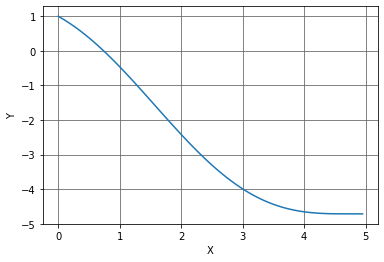

In [ ]:
x=arange(0,5,0.05) #Rango del gráfico y espaciamiento del mismo
p,=plot(x,cos(x)-x)
xlabel('X')
ylabel('Y')
plt.grid(b=True, which='major', color='#666666', linestyle='-')

La función posee un cero entre x=0 y x=1.

Primero, crearemos una función de Python que retorne el valor de la función, pues, de esta manera, están programados los algoritmos de estos cinco métodos. Luego, evaluaremos dicha con los métodos de regla falsa, secante, trisección y Newton modificado:

In [ ]:
#Definición de la función

def funcion(x):
  return np.cos(x)-x

#Definición de la primera derivada de la función (se necesitará para el método de Newton modificado)
def df(x):
  return -(np.sin(x))-1

#Definición de la segunda derivada de la función (se necesitará para el método de Newton modificado)

def d2f(x):
  return -(np.cos(x))

Con las función definida y su primera y segunda derivada, procedemos a correr los algoritmos. Para la regla falsa y secante, utilizaremos *a*=0, *b*=1, *tol*=10e-8 y *maxiter*=100. Para el método de la secante, utilizaremos como aproximaciones iniciales *p0*=0.5 y *p1*=π/4 y conservaremos la tolerancia *tol* (como *epsilon*) y el número máximo de iteraciones *maxiter*. Para el método de Newton modificado, usaremos *delta*=*tol*(*epsilon*)=10e-8 y como aproximación inicial *p0*=0.5.

In [ ]:
regulafalsi(0,1,10**-8,100)

La raíz buscada es 0.7390851331710708, con una tolerancia de 1e-08. El número de iteraciones utilizadas fue de 9.


In [ ]:
triseccion(0,1,10**-8,100)

La raíz buscada es 0.7390851287681897, con una tolerancia de 1e-08. El número de iteraciones utilizadas fue de 17.


In [ ]:
secante(0.5,(np.pi)/4,10**-8,100)

La raíz buscada es 0.7390851332151607, con una tolerancia de 1e-08. El número de iteraciones utilizadas fue de 6.


In [ ]:
newtonmod(0.5,10**-8,10**-8,100)

La raíz buscada es 0.7390851321653727, con una tolerancia de 1e-08. El número de iteraciones utilizadas fue de 3.


Podemos concluir que el método que presenta mejores resultados y en menor tiempo es el método de Newton modificado. El método de trisección es el más lento, lo cual puede ser una desventaja, aunque su convergencia a la solución esté garantizada. Por otra parte, el método de la secante puede ser bastante recomendable, debido a que simplifica los cálculos de las derivadas y provee también resultados bastante buenos.

**Ejemplo (Para Newton Acelerado y Newton Modificado)**

Para el método de Newton acelerado, utilizaremos un ejemplo diferente. Como es un método que se vale de la multiplicidad de la raíz para acelerar su convergencia, es más práctico utilizarlo con una función que tenga al menos una raíz múltiple y evaluar su convergencia hacia ella.

La función a evaluar será f(x= exp(x)-x-1. Esta función posee una raíz múltiple en 0, pues f(0)=f'(0)=0 y f''(0)=1. O sea, 0 es un cero de multiplicidad 2 de la función.

Procedemos a definir la misma en una función de Python, así como también su derivada:

In [ ]:
#Definición de la función
def funcion(x):
  return np.exp(x)-x-1

#Definición de la primera derivada de la función
def df(x):
  return np.exp(x)-1

Este es el gráfico de la misma:

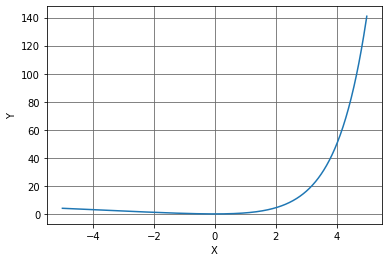

In [ ]:
x=arange(-5,5,0.01) #Rango del gráfico y espaciamiento del mismo
p,=plot(x,exp(x)-x-1)
xlabel('X')
ylabel('Y')
plt.grid(b=True, which='major', color='#666666', linestyle='-')

Se puede intuir la naturaleza tangencial de la función en x=0 según el gráfico, lo cual concuerda con la definición de raíz múltiple (es lo que sucede gráficamente cuando existe una). Procedemos ahora a utilizar el método de Newton acelerado, con *p0*=1, *m*=2,*delta*=*epsilon*=10**-8 y *maxiter*=100.

In [ ]:
newtonacel(1,2,10**-8,10**-8,100)

La raíz buscada es 3.342250383920123e-06, con una tolerancia de 1e-08. El número de iteraciones utilizadas fue de 3.


Realicemos una comparación entre los resultados de Newton acelerado y Newton modificado. Para correr el algoritmo de Newton modificado, es necesario definir la segunda derivada de la función ejemplo estudiada y utilizaremos las mismas variables de entrada de Newton acelerado.

In [ ]:
def d2f(x):
  return np.exp(x)

In [ ]:
newtonmod(1,10**-8,10**-8,100)

La raíz buscada es -1.1890183808588653e-05, con una tolerancia de 1e-08. El número de iteraciones utilizadas fue de 3.


La velocidad de convergencia a la solución de ambos métodos es bastante similar y buena. La diferencia entre ambos resultados es mínimamente mejor en el caso del método de Newton acelerado, pero hay que tener en cuenta también que, al tratarse la solución del origen de coordenadas, la cercanía de la solución al mismo tanto del numerador como del denominador de la expresión iterada, genera una pérdida de dígitos significativos. Cada método tiene sus ventajas con respecto al otro: mientras que en uno se debe conocer la multiplicidad de la raíz, en el otro se deben calcular dos derivadas. Puede recomendarse el uso indistinto de cada uno de estos dos para este caso de raíces múltiples, y la elección depende principalmente de la facilidad del cálculo de los parámetros y funciones necesarias para cada uno.